In [37]:
from keras.models import Sequential

In [63]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [64]:
model=Sequential()

In [17]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [19]:
from keras import optimizers

In [20]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['accuracy'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen=ImageDataGenerator(1./255)
test_datagen=ImageDataGenerator(1./255)

In [25]:
train_dir='C:/Users/jithi/Desktop/dogs_cats/train'

In [27]:
train_generator = train_datagen.flow_from_directory(
train_dir, target_size=(150, 150), batch_size=20,
class_mode='binary')

Found 200 images belonging to 2 classes.


In [30]:
validation_dir='C:/Users/jithi/Desktop/dogs_cats/valid'

In [31]:
validation_generator=test_datagen.flow_from_directory(
validation_dir, target_size=(150, 150), batch_size=20,
class_mode='binary')

Found 80 images belonging to 2 classes.


In [33]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

C:\Users\jithi\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [34]:
history = model.fit_generator(
train_generator,
steps_per_epoch=5,
epochs=10,
validation_data=validation_generator,
validation_steps=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
5/5 [==============================] - 4s 716ms/step - loss: 25.3932 - accuracy: 0.5000 - val_loss: 4.7644 - val_accuracy: 0.5750
Epoch 2/10
5/5 [==============================] - 3s 640ms/step - loss: 5.2543 - accuracy: 0.5100 - val_loss: 7.6406 - val_accuracy: 0.4750
Epoch 3/10
5/5 [==============================] - 3s 601ms/step - loss: 3.0832 - accuracy: 0.6100 - val_loss: 1.1925 - val_accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 3s 574ms/step - loss: 1.4672 - accuracy: 0.6300 - val_loss: 1.1578 - val_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 3s 576ms/step - loss: 0.6851 - accuracy: 0.7600 - val_loss: 1.0754 - val_accuracy: 0.5750
Epoch 6/10
5/5 [==============================] - 3s 633ms/step - loss: 0.8454 - accuracy: 0.7600 - val_loss: 0.9743 - val_accuracy: 0.6500
Epoch 7/10
5/5 [==============================] - 3s 587ms/step - loss: 1.3424 - ac

In [35]:
model.save('C:/Users/jithi/Desktop/cats_and_dogs_small_1.h5')

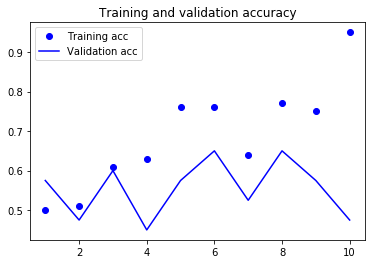

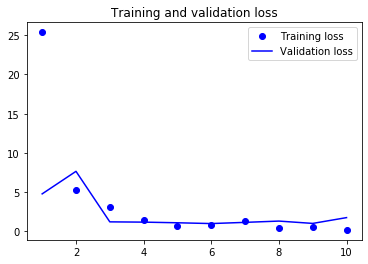

In [36]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [42]:
from keras.preprocessing import image
train_cats_dir='C:/Users/jithi/Desktop/dogs_cats/train/cat'

In [43]:
import os
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [47]:
img_path=fnames[3]

In [48]:
img_path

'C:/Users/jithi/Desktop/dogs_cats/train/cat\\cat.1113.jpg'

In [49]:
img=image.load_img(img_path, target_size=(150, 150))

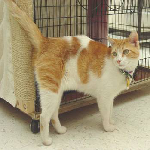

In [50]:
img

In [51]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

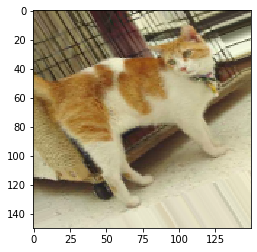

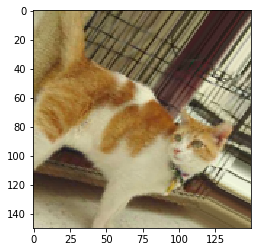

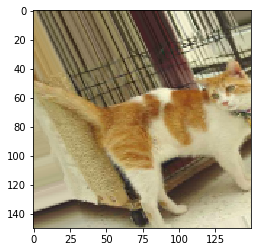

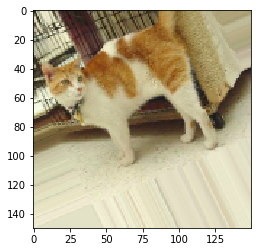

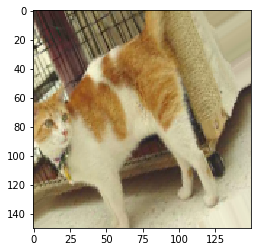

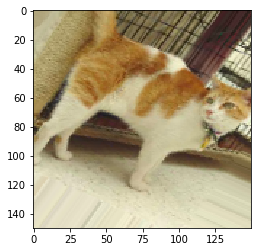

In [61]:
i=0
for batch in datagen.flow(x, batch_size=3):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [73]:
model1=Sequential()
model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['accuracy'])


In [74]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [75]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [79]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 200 images belonging to 2 classes.


In [80]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 80 images belonging to 2 classes.


In [81]:
history = model1.fit_generator(
train_generator,
steps_per_epoch=5,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/10
5/5 [==============================] - 3s 687ms/step - loss: 0.7074 - accuracy: 0.5000 - val_loss: 0.6870 - val_accuracy: 0.6375
Epoch 2/10
5/5 [==============================] - 3s 544ms/step - loss: 0.6961 - accuracy: 0.5400
Epoch 3/10
5/5 [==============================] - 3s 513ms/step - loss: 0.6860 - accuracy: 0.5600
Epoch 4/10
5/5 [==============================] - 3s 537ms/step - loss: 0.6760 - accuracy: 0.5800
Epoch 5/10
5/5 [==============================] - 3s 541ms/step - loss: 0.7084 - accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 3s 514ms/step - loss: 0.6788 - accuracy: 0.6200
Epoch 7/10
5/5 [==============================] - 3s 668ms/step - loss: 0.6964 - accuracy: 0.5200
Epoch 8/10
5/5 [==============================] - 4s 803ms/step - loss: 0.6757 - accuracy: 0.6000
Epoch 9/10
5/5 [==============================] - 3s 677ms/step - loss: 0.6780 - accuracy: 0.5600
Epoch 10/10
5/5 [==============================] - 3s 592ms/step - loss: 0.6